In [0]:
import pandas as pd
import numpy as np
import  matplotlib.pyplot as plt

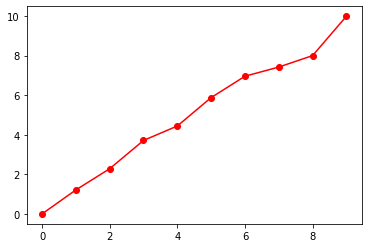

In [17]:
data = {
    'x': np.arange(10),
    'y': np.arange(10) + np.random.rand(10)
}
df = pd.DataFrame(data)
plt.plot(df['x'], df['y'], 'ro-')

In [18]:
from sklearn.linear_model import LinearRegression
model0 = LinearRegression()

In [19]:
model0.fit(df[['x']], df['y'])
print('slope/ m:', model0.coef_)
print('intercept/ c:', model0.intercept_)

slope/ m: [1.05639364]
intercept/ c: 0.23722976963970765


In [20]:
df["y best"] = model0.predict(df[['x']])
df

,x,y,y best
0,0,0.000116,0.237230
1,1,1.213256,1.293623
2,2,2.284530,2.350017
3,3,3.713558,3.406411
4,4,4.444081,4.462804
5,5,5.879016,5.519198
6,6,6.959431,6.575592
7,7,7.422891,7.631985
8,8,8.001888,8.688379
9,9,9.991245,9.744773


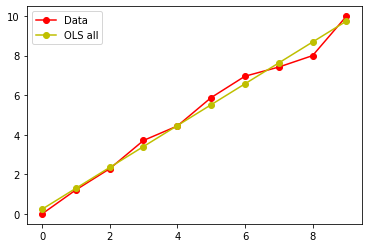

In [21]:
plt.plot(df['x'], df['y'], 'ro-')
plt.plot(df['x'], df['y best'], 'yo-')
plt.legend(['Data', 'OLS all'])

## Linear Regression, train random data

In [22]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df[['x']], df['y'], test_size = .2)

In [23]:
print(x_test)
print('\n')
print(y_test)

x
3  3
7  7


3    3.713558
7    7.422891
Name: y, dtype: float64


In [24]:
model0.fit(x_train,y_train)
df['y 80'] = model0.predict(df[['x']])
df

,x,y,y best,y 80
0,0,0.000116,0.237230,0.167457
1,1,1.213256,1.293623,1.236997
2,2,2.284530,2.350017,2.306537
3,3,3.713558,3.406411,3.376078
4,4,4.444081,4.462804,4.445618
5,5,5.879016,5.519198,5.515158
6,6,6.959431,6.575592,6.584698
7,7,7.422891,7.631985,7.654238
8,8,8.001888,8.688379,8.723778
9,9,9.991245,9.744773,9.793319


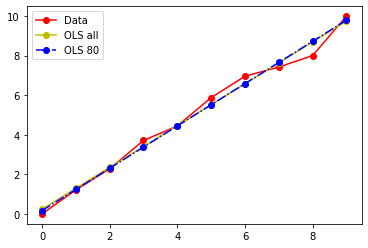

In [25]:
plt.plot(df['x'], df['y'], 'ro-')
plt.plot(df['x'], df['y best'], 'yo-')
plt.plot(df['x'], df['y 80'], 'bo-.')
plt.legend(['Data', 'OLS all', 'OLS 80'])

### OLS train 2 Data x[5], x[6]

In [26]:
model0.fit(df[['x']].iloc[:2], df['y'].iloc[:2])
df['y 20'] = model0.predict(df[['x']])
df

,x,y,y best,y 80,y 20
0,0,0.000116,0.237230,0.167457,0.000116
1,1,1.213256,1.293623,1.236997,1.213256
2,2,2.284530,2.350017,2.306537,2.426396
3,3,3.713558,3.406411,3.376078,3.639536
4,4,4.444081,4.462804,4.445618,4.852676
5,5,5.879016,5.519198,5.515158,6.065816
6,6,6.959431,6.575592,6.584698,7.278956
7,7,7.422891,7.631985,7.654238,8.492096
8,8,8.001888,8.688379,8.723778,9.705236
9,9,9.991245,9.744773,9.793319,10.918375


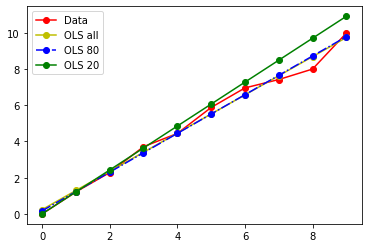

In [27]:
plt.plot(df['x'], df['y'], 'ro-')
plt.plot(df['x'], df['y best'], 'yo-')
plt.plot(df['x'], df['y 80'], 'bo-.')
plt.plot(df['x'], df['y 20'], 'go-')
plt.legend(['Data', 'OLS all', 'OLS 80', 'OLS 20'])

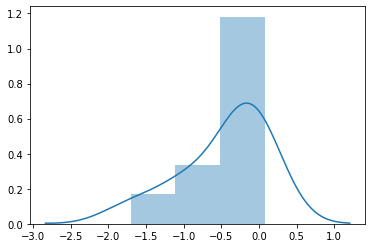

In [28]:
#plot residual/ selisih antara y dengan y"
import seaborn as sb
sb.distplot((df['y'] - df['y 20']))

### Ridge Regression

Sum Square Error $ = \sum (y - \hat{y})^2 $
$$ RR = SSE\quad OLS + \lambda \times m^2 $$

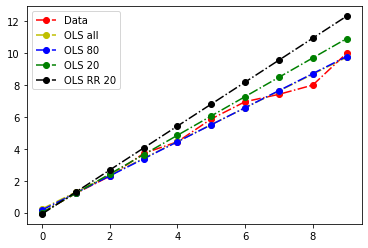

In [29]:
from sklearn.linear_model import Ridge
model1 = Ridge(alpha = -0.06)
model1.fit(df[['x']].iloc[:2], df['y'].iloc[:2])
df['y 20 RR'] = model1.predict(df[['x']])

plt.plot(df['x'], df['y'], 'ro-.')
plt.plot(df['x'], df['y best'], 'yo-.')
plt.plot(df['x'], df['y 80'], 'bo-.')
plt.plot(df['x'], df['y 20'], 'go-.')
plt.plot(df['x'], df['y 20 RR'], 'ko-.')
plt.legend(['Data', 'OLS all', 'OLS 80', 'OLS 20', 'OLS RR 20'])

<hr>

### LASSO Regression
LASSO (Least B)

Sum Squared Error OLS $ = \sum |y - \hat{y}| $

SSE LASSO = SAE OLS $ + \lambda.|m| $

Nilai penalti L1 Regression $ + \lambda . |m| $

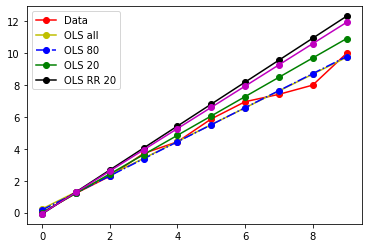

In [30]:
from sklearn.linear_model import Lasso
model2 = Lasso(alpha=-0.03)
model2.fit(df[['x']].iloc[:2], df['y'].iloc[:2])
df['y 20 L'] = model2.predict(df[['x']])

plt.plot(df['x'], df['y'], 'ro-')
plt.plot(df['x'], df['y best'], 'yo-')
plt.plot(df['x'], df['y 80'], 'bo-.')
plt.plot(df['x'], df['y 20'], 'go-')
plt.plot(df['x'], df['y 20 RR'], 'ko-')
plt.plot(df['x'], df['y 20 L'], 'mo-')
plt.legend(['Data', 'OLS all', 'OLS 80', 'OLS 20', 'OLS RR 20'])

<hr>

### ELASTIC-NET

Sum Squared Error OLS $ = \sum |y - \hat{y}| $

SSE EN = SSE OLS 
$\displaystyle + \lambda_{ridge} . m^2 + \lambda_{lasso} . |m|$

Nilai penalti L1 + L2 Regularization $ + \lambda_{ridge} . m^2 + \lambda . |m| $

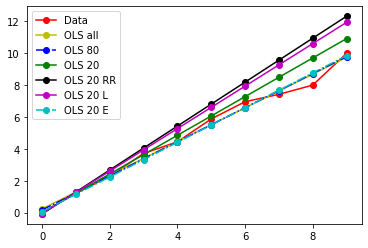

In [55]:
from sklearn.linear_model import ElasticNet
model3 = ElasticNet(alpha=0.03)
model3.fit(df[['x']].iloc[:2], df['y'].iloc[:2])
df['y 20 E'] = model3.predict(df[['x']])

plt.plot(df['x'], df['y'], 'ro-')
plt.plot(df['x'], df['y best'], 'yo-')
plt.plot(df['x'], df['y 80'], 'bo-.')
plt.plot(df['x'], df['y 20'], 'go-')
plt.plot(df['x'], df['y 20 RR'], 'ko-')
plt.plot(df['x'], df['y 20 L'], 'mo-')
plt.plot(df['x'], df['y 20 E'], 'co-.')
plt.legend(['Data', 'OLS all', 'OLS 80', 'OLS 20', 'OLS 20 RR', 'OLS 20 L', 'OLS 20 E'])